# Markov Chains and MonteCarlo Simulations

In [ ]:
# Libraries
import numpy as np


## Gambler's ruin problem

Player $M$ has $1$ dollar and player $N$ has $2$ dollars. Each game gives the winner $1$ from the other. As
a better player, $M$ wins $\frac{2}{3}$ of the games. They play until one of them is bankrupt. What
is the probability that $M$ wins?


### Solution:

First, note that player M can only win after an even amount of plays and only after one game has been played, so we consider $m$ to be the number of games played such that $m>0$ and $m \in 2\mathbb{Z}$. Then, by the Transition Matrix given in the problem:

$$
\begin{bmatrix}
1&0&0&0\\
\frac{1}{3}&0&\frac{2}{3}&0\\
0&\frac{1}{3}&0&\frac{2}{3}\\
0&0&0&1\\
\end{bmatrix}
$$

we see the probability for player M to win specifically on the $m^{\text{th}}$ game is $P_m(M) = (\frac{2}{3})^{\frac{m}{2}+1} (\frac{1}{3})^{\frac{m}{2}-1}$, so for a 2-game win, player M has $P_2(M) = (\frac{2}{3})^{2} (\frac{1}{3})^{0} = \frac{4}{9}$. For winning after four games, we have $P_4(M) = (\frac{2}{3})^{3} (\frac{1}{3})^{1} = \frac{8}{81}$, but notice that we need to add the probability that player M won on the second game, so true probability is $P_4(M) = \frac{4}{9}+\frac{8}{81} = \frac{44}{81}$. Thus, the true probability of player M winning after $m$ games is:

$$
\begin{align}
P_m(M) = \sum_{i=2}^{m} (\frac{2}{3})^{\frac{i}{2}+1} (\frac{1}{3})^{\frac{i}{2}-1},\text{ } m\in2\mathbb{Z}.
\end{align}
$$

We can extend this to an arbitrary limit, giving us:

$$
\begin{align}
P_m(M) &= \sum_{i=2}^{m} (\frac{2}{3})^{\frac{i}{2}+1} (\frac{1}{3})^{\frac{i}{2}-1}\\
&= \sum_{i=2}^{m} (\frac{2}{3})^2(\frac{2}{3})^{\frac{i}{2}-1} (\frac{1}{3})^{\frac{i}{2}-1}\\
&= \frac{4}{9}\sum_{i=2}^{m} (\frac{2}{9})^{\frac{i}{2}-1}\\
\text{Let } n=\frac{m}{2}-1,\text{ } n>0,\text{ } n\in\mathbb{Z}, \text{ then}... &= \frac{4}{9}\sum_{i=0}^{2n+2} (\frac{2}{9})^{n},\\
\text{Where } \lim_{n\rightarrow\infty} \frac{4}{9}\sum_{i=0}^{2n+2} (\frac{2}{9})^{n} &= \frac{\frac{4}{9}}{1-\frac{2}{9}}\\
&= \frac{4}{7} .
\end{align}
$$

So, the probability of player M converges to $.5714$.

Alternatively (and more simply), we can use the First Step Analysis of Markov Chain:

$$
\begin{align*}
u(a) &= P(X_T = a+b | X_0 = a)\\
&= P(X_T = 3 | X_0 = 1)\\
&= \frac{(\frac{\frac{1}{3}}{\frac{2}{3}})^a-1}{(\frac{\frac{1}{3}}{\frac{2}{3}})^{a+b}-1}\\
&= \frac{(\frac{1}{2})^1-1}{(\frac{1}{2})^3-1}\\
&= \frac{-\frac{1}{2}}{-\frac{7}{8}}\\
&= \frac{4}{7} .
\end{align*}
$$


---

## Markov Chain MonteCarlo Simulation Class


Here, you are going to implement the time homogenous Markov Chain simuation. We would like to simulate the Markov chain for $T$ steps when given transition matrix and initial probability vector.

The input parameter is ```status_num``` which is the number of states in Markov Chain. In the class, it has two parameters.

- ```pi``` is the initial probability vector, with the size of ```status_num```. In particular, if ```pi=[1,0,0]```, it implies the initial state of the  is 0.  

- ```P``` is the transition matrix of the Markov Chain, with the size of ```(status_num, status_num)```. Note each row should sums to 1.

We talked about the algorithm to simulate Markov Chain. Here is the brief summary of the algorithm.

- Sample the initial state $i_0$ that follows the multinormial distribution ```pi```. Set $X_0=i_0$ and $n=0$.

- For $n< T$:
   - Sample the state $i_{n+1}$ follows the multinormial distribution ```P[i_n]```, which is $i_n$-th row of the transition matrix $P$.
   - Set $X_{n+1}=i_{n+1}$ and $n\leftarrow n+1$.


You may use ```numpy.random.Generator.multinomial``` function to draw samples from a multinomial distribution.    

You will test your implemented class in the following script. Make certain that your implementation works correctly before moving on to the next part.



### Solution:

In [1]:
class MarkovModel(object):

    def __init__(self, status_num=None):
        # Initial Probability Vector
        self.pi = np.zeros(status_num)
        # Probability Transition matrix
        self.P = np.zeros(shape=(status_num, status_num))
        self.results = np.zeros(2, dtype=int)

    def simulation(self, steps=100):
        """
        Simulates the Markov process for a given number of steps.
        Args:
            steps (int): Number of steps to simulate. Default is 100.
        """
        if steps <= 0:
            raise ValueError("Number of steps must be a positive integer.")
        
        # initialize RNG
        rng = np.random.default_rng()
        # take multinomial of pi
        temp_pi = rng.multinomial(1, self.pi)

        for step in range(steps):

            i = 0
            # gathers the index of the row that will become the next pi
            for j in temp_pi:
                if j == 1:
                    new_pi = self.P[i]
                else: 
                    i+=1

            # if we're on the last step or an ending has been reached, we get the result
            if step == steps or new_pi[0]== 1 or new_pi[-1] == 1:
                self.record(new_pi)
                break
            # if we're not on the last step, we take the multinomial of the pi that we just got
            else:
                temp_pi = rng.multinomial(1, new_pi)
    
    def record(self, sim_pi):
        """
        Adds a result to the results array based on the simulated state.
        Args:
            sim_pi (np.ndarray): The state after simulation.
        """
        result = np.dot(sim_pi, self.P)
        if result[0] == 1:
            self.results[0] += 1
        elif result[-1] == 1:
            self.results[1] += 1
        # If neither end state is reached, do nothing.
    
    def montecarlo(self, trials=1000, steps=100):
        """
        Runs a Monte Carlo simulation for a specified number of trials.
        Args:
            trials (int): Number of trials to run. Default is 1000.
            steps (int): Upper bound for steps in each trial. Default is 100.
        """
        if trials <= 0:
            raise ValueError("Number of trials must be a positive integer.")
        if steps <= 0:
            raise ValueError("Number of steps must be a positive integer.")
        
        for _ in range(trials):
            self.simulation(steps)
    
    def set_P(self, P):
        if P.shape != self.P.shape:
            raise ValueError("Shape of P does not match the transition matrix dimensions.")
        if not np.allclose(np.sum(P, axis=1), 1):
            raise ValueError("Rows of P must sum to 1.")
        self.P = np.array(P, dtype=float)
    
    def set_pi(self, pi):
        if len(pi) != self.pi.shape[0]:
            raise ValueError("Length of pi does not match the number of states.")
        if not np.isclose(np.sum(pi), 1):
            raise ValueError("pi must sum to 1.")
        self.pi = np.array(pi, dtype=float)
    
    def get_results(self):
        """
        Returns the results of the simulation.
        Returns:
            np.ndarray: An array containing the counts of reaching the first and last states.
        """
        return self.results.copy()


---

## Verify

Design a Monte Carlo Simulation experiment to verify the initial example above.

- You need to specifiy the transition matrix and initial probability vector by yourself.  

- You should run as many independent trajectories with the same initial probability vector and record which player wins at end.

- You should set $T$ relatively large. If your simulated trajectory doesn't end with either player win, you should discard this trajectory.


### Your Solution

In [4]:
# transition matrix from above
P = np.asarray([[1,0,0,0],
    [1/3,0,2/3,0],
    [0,1/3,0,2/3],
    [0,0,0,1]])

# defining the initial probability vector (Player N starts in State 1 in the above example)
pi = np.asarray([0, 1, 0, 0]) 

# creating the Markov model instance
model = MarkovModel(status_num=4)
model.set_P(P)
model.set_pi(pi)
model.montecarlo(trials=100000, steps=100)
result = model.get_results()
n_win, m_win = result

# printing the results
print("Results of the Markov Model Simulation with Player B starting in State 1:")
print(f"Player N wins: {n_win}")
print(f"Player M wins: {m_win}")
print(f"The MonteCarlo simulation completed {np.sum(result)} times.")
print(f"The simulation predicts that the Player M wins {np.round(100*m_win/np.sum(result),3)}% of the time.")

Results of the Markov Model Simulation with Player B starting in State 1:
Player N wins: 42887
Player M wins: 57113
The MonteCarlo simulation completed 100000 times.
The simulation predicts that the Player M wins 57.113% of the time.



---


## Dice Problem
Two players bet on roll(s) of the total of two standard six-face dice. Player A bets that a
sum of 12 will occur first. Player B bets that two consecutive 7s will occur first. The
players keep rolling the dice and record the sums until one player wins.

- What is the
probability that A will win?

- Please design a Monte Carlo Simulation using numpy and scipy to verify your solution.




### Your Solution:

Consider the following transition matrix of the problem outlined above:

$$
\begin{bmatrix}
1&0&0&0\\
\frac{1}{6}&0&\frac{29}{36}&\frac{1}{36}\\
0&\frac{1}{6}&\frac{29}{36}&\frac{1}{36}\\
0&0&0&1\\
\end{bmatrix}
$$

where the rows indicate, in order, states $77, 7, S, 12$, where $S$ is always the starting state. The players will play until one person wins, so we need only consider the probability of either player winning after arbitrary time.

Player B has no chance to win on any one roll, unless the roll prior was a 7, so $P_{S,77} = P_{S,7}P_{7,77} = \frac{1}{36}$. Player A can win on any roll, so the previous state holds no bar, i.e $P_{S,12} = 1/36$, but also $P_{S,12} = P_{S,7}P_{7,12} = \frac{1}{6}*\frac{1}{36} = \frac{1}{216}$. Taking the sum, we get the true probability of player A winning to be $\frac{7}{216}$. We get that the probability of player A winning, by First Step Analysis, is the following:

$$
\begin{align*}
\frac{(\beta/\alpha)^a -1}{(\beta/\alpha)^{a+b}-1} &= \frac{(\frac{6/216}{7/216})-1}{(\frac{6/216}{7/216})^2-1}\\
&= \frac{(6/7)-1}{(6/7)^2-1}\\
&= \frac{-1/7}{36/49-1}\\
&= \frac{-1/7}{-13/49}\\
&= \frac{7}{13} = .538
\end{align*}
$$


In [83]:
## Dice Game Simulation (Class Variation)

class DiceGame(object):

    def __init__(self):
        self.results = np.zeros(2, dtype=int)
    
    def roll(self, state=2):
        """
        Simulates a dice roll for the game.
        Args:
            state (int): The current state of the game. Only used for recursive calls.
        """
        roll_1 = np.random.randint(1,7)
        roll_2 = np.random.randint(1,7)
        roll_sum = roll_1 + roll_2
        
        if roll_sum == 12:
            self.results[1] += 1  # Player A wins
        elif roll_sum == 7:
            # function calls itself again for another seven
            if state == 2:
                self.roll(state=1)
            elif state == 1:
                self.results[0] += 1  # Player B wins
        else:
            self.roll()
    
    def play(self, trials=1000):
        """
        Plays the dice game for a specified number of trials.
        Args:
            trials (int): Number of trials to run. 
                One trial does not end until a result is reached. Default is 1000.
        """
        if trials <= 0:
            raise ValueError("Number of trials must be a positive integer.")
        
        for _ in range(trials): # run the game for the specified number of trials
            self.roll()
    
    def get_results(self):
        # Returns the results of the dice game
        return self.results.copy()

# Creating the DiceGame instance
dice_game = DiceGame()

# Running the dice game simulation
dice_game.play(trials=250000)

# Getting the results
result = dice_game.get_results()

# Printing the results of the dice game
print("Results of the Dice Game Simulation:")
print(f"Player A wins: {result[1]}")
print(f"Player B wins: {result[0]}")
print(f"The simulation predicts that Player A wins {np.round(100*result[1]/np.sum(result),3)}% of the time.")


Results of the Dice Game Simulation:
Player A wins: 134573
Player B wins: 115427
The simulation predicts that Player A wins 53.829% of the time.


In [87]:
## Dice Game Simulation (Function + Loop Variation)

def roll(number):
    roll_1 = np.random.randint(1,7)
    roll_2 = np.random.randint(1,7)
    if roll_1 + roll_2 == 12:
        return [1,0]
    elif roll_1 + roll_2 == 7:
        #function calls itself again for another seven
        if number == 0:
            return roll(1)
        elif number == 1:
            return [0,1]
    else:
        return [0,0]


sim_number = 100000
parse = 0
A_wins = 0
B_wins = 0

#just fun variables to see the mean/stdev of how many rolls it takes to get a winner
rolls_to_win = 0
roll_number_list = []

while parse != sim_number:
    #fun variable actions
    rolls_to_win += 1
    #fun variable actions

    parse += 1
    current_roll = roll(0)
    if current_roll == [0,0]:
        #subtract from the parse to not change the sim number
        parse -= 1
    else:
        #outcome of rolls() is a vector, so if player A won, A_wins will add a 1, B_wins will add a 0, and vise versa when player B wins
        A_wins += current_roll[0]
        B_wins += current_roll[1]

        #fun variable actions
        roll_number_list.append(rolls_to_win)
        rolls_to_win = 0
        #fun variable actions

#fun variable actions
rolls_total = 0
for i in roll_number_list:
    rolls_total += i

mean_rolls = rolls_total/sim_number

inter_total = float(0)
for i in roll_number_list:
    num = float(i)-mean_rolls
    inter_total += num*num
stdev_rolls = np.sqrt(inter_total/(sim_number-1))
#fun variable actions

A_win_prob = A_wins/sim_number
B_win_prob = B_wins/sim_number
print("The Monte Carlo Simulation of", sim_number, "simulations predicts that Player A has a probability of", A_win_prob, "to win a game")
print("The average rolls-per-game was", round(mean_rolls,2), "with a standard deviation of", round(stdev_rolls,2))

The Monte Carlo Simulation of 100000 simulations predicts that Player A has a probability of 0.5382 to win a game
The average rolls-per-game was 16.58 with a standard deviation of 16.14


In [57]:
## Markov Model for the Dice Game

# defining the transition matrix
P = np.asarray([
    [1,0,0,0],
    [1/6,0,29/36,1/36],
    [0,1/6,29/36,1/36],
    [0,0,0,1]])

# defining the initial probability vector
# Since Player A needs two 7's in a row to win, we start in State 3 (Player B's "turn")
pi = np.asarray([0, 0, 1, 0])

# creating the Markov model instance
model = MarkovModel(status_num=4)
model.set_P(P)
model.set_pi(pi)
model.montecarlo(trials=100000,steps=100)
a_win, b_win = model.get_results()

# printing the results
print("Results of the Markov Model Simulation:")
print(f"Player A wins: {a_win}")
print(f"Player B wins: {b_win}")
print(f"The MonteCarlo simulation completed {np.sum(model.results)} times.")
print(f"The simulation predicts that the player B wins {np.round(100*b_win/np.sum(model.results),3)}% of the time.")

Results of the Markov Model Simulation:
Player A wins: 45967
Player B wins: 53573
The MonteCarlo simulation completed 99540 times.
The simulation predicts that the player B wins 53.821% of the time.



---

## Drunk Man (Random Walk)

A drunk man is at the 17th meter of a 100-meter-long bridge. He has a 50% probability of staggering forward or backward one meter each step. What is the probability that he will make it to the end of the bridge (the 100th meter) before the beginning (the 0th
meter)? What is the expected number of steps he takes to reach either the beginning or the end of the bridge?

### Your Solution

We have the transition matrix of the following form:

$$
\begin{bmatrix} 1 & 0 & 0 & 0 & ... & 0 & 0 & 0 & 0\\
.5 & 0 & .5 & 0 & ... & 0 & 0 & 0 & 0\\
0 & .5 & 0 & .5 & ... & 0 & 0 & 0 & 0\\
... & ... & ... & ... & ... & ... & ... & ... & ... \\
0 & 0 & 0 & 0 & ... & .5 & 0 & .5 & 0\\
0 & 0 & 0 & 0 & ... & 0 & .5 & 0 & .5\\
0 & 0 & 0 & 0 & ... & 0 & 0 & 0 & 1 \end{bmatrix}
$$

where we desire $P( T_{100} \lt T_0| X_0=17)$ which, for any $a \in [x,y]$ has a simple solution of $\frac{a-x}{y-x}$, so for our case of $a=17, x=0, y=100$, we have $\frac{17-0}{100-0} = .17$


We also desire the expected number of steps the man walks to either side of the bridge. We consider the first step in the chain starting at step a, i.e. $k_x^c = 1 + (\frac{1}{2}k_{x-1}^c+\frac{1}{2}k_{x+1}^c)$, which, for a lower bound of $b$ and an upper bound of $c$, has the solution $k_x^c = -x^2+(c-b)x+bc = (c-x)(x-b)$ where for $x=17, b=0, c=100$ we get $k_{17}^{100}= (100-17)(17-0)83*17 = 1411$.


In [ ]:
# function that takes one step
def step():
    x = np.random.randint(0,2)
    if x == 0:
        return -1
    else:
        return 1

# function that does one walk
def walk(starting_step, upper_bound, lower_bound):
    number_of_steps = 0
    n = starting_step
    while n != lower_bound and n != upper_bound:
        n += step()
        number_of_steps += 1
    return [n, number_of_steps]

# simulation parameters
sim_count = 20000
parse = 0

# begining parameters
begining = 0
end = 100
starting_point = 17

# evaluation parameters
begin_win = 0
end_win = 0
begin_steps = 0
end_steps = 0

# simulation of many walks
while parse < sim_count:
    sim = walk(starting_point, end, begining)
    if sim[0] == begining:
        begin_win += 1
        begin_steps += sim[1]
    elif sim[0] == end:
        end_win += 1
        end_steps += sim[1]
    parse += 1

print(f"We can expect that the drunk man will stumble to the end of the bridge with a probability of {end_win/sim_count}.")
print(f"The expected number of steps to the end of the bridge is {round(end_steps/end_win)}.")
print(f"The expected number of steps to the begining of the bridge is {round(begin_steps/begin_win)}.")
print(f"The expected number of steps to either the begining or the end of the bridge is {(end_steps+begin_steps)/sim_count}.")

We can expect that the drunk man will stumble to the end of the bridge with a probability of 0.16565
The expected number of steps to the end of the bridge is 3230
The expected number of steps to the begining of the bridge is 1044
The expected number of steps to either the begining or the end of the bridge is 1406.2885



---

## Coin Triplets 

If you keep on tossing a fair coin,

a) What is the expected number of tosses such that you can have HHH (heads heads heads) in a row?

b) What is the expected number of tosses to have THH (tails heads heads) in a row?

### Your Solution

a) The transition matrix for the problem is:

$$
\begin{bmatrix} 1/2 & 1/2 & 0 & 0 \\
     1/2 & 0 & 1/2 & 0 \\
     1/2 & 0 & 0 & 1/2 \\
     0 & 0 & 0 & 1  \end{bmatrix}.
$$

We have the following expected number of tosses for a first HHH outcome to be:

$$
\begin{align}
K_0^3 &= 1 + \frac{1}{2}K_0^3 + \frac{1}{2} K_1^3\\
&= 1 + \frac{1}{2}K_0^3 + \frac{1}{2} (1 + \frac{1}{2}K_0^3 + \frac{1}{2} K_2^3)\\
&= \frac{3}{2} + \frac{3}{4}K_0^3 + \frac{1}{4} (1 + \frac{1}{2}K_0^3 + \frac{1}{2} K_3^3)\\
&= \frac{7}{4} + \frac{7}{8}K_0^3\\
&\Rightarrow K_0^3 = 14.
\end{align}
$$



b) The transition matrix for the problem is:

$$
\begin{bmatrix} 1/2 & 1/2 & 0 & 0 \\
     0 & 1/2 & 1/2 & 0 \\
     0 & 1/2 & 0 & 1/2 \\
     0 & 0 & 0 & 1  \end{bmatrix}.
$$

We have the following expected number of tosses for a first THH outcome to be:

$$
\begin{align*}
H_{0,3} &= 1 + \frac{1}{2}K_0^3 + \frac{1}{2} K_1^3\\
\\
\text{where} \;\; K_1^3 &= 1 + \frac{1}{2}K_1^3 + \frac{1}{2} K_2^3\\
\\
&= 1 + \frac{1}{2}K_1^3 + \frac{1}{2}(1 + \frac{1}{2}K_1^3 + \frac{1}{2} K_3^3)\\
\\
&= \frac{3}{2} + \frac{3}{4}K_1^3\\
\\
&\Rightarrow K_1^3 = 6,\\
\\
\text{so,} \;\; K_0^3 &= 4 + \frac{1}{2} K_0^3\\
\\
&\Rightarrow K_0^3 = 8 .
\end{align*}
$$

In [10]:
class CoinTriplets(object):

    def __init__(self):
        self.results = np.zeros(2, dtype=int) # number of tosses for HHH (0) and THH (1)
        self.toss_count = 0 # number of tosses in the current game
        

    def toss(self):
        return np.random.randint(0, 2) # # 0 for Heads, 1 for Tails
    
    def toss_check(self, tosses):
        """
        Checks three tosses for specific outcomes. 
        If the tosses are [0, 0, 0] (HHH) OR [1, 0, 0] (THH), we record the toss count.
        Args:
            tosses (list): A list of three tosses (0 for Heads, 1 for Tails).
        """
        if tosses == [0, 0, 0] and not self.HHH:
            self.results[0] += self.toss_count 
            self.HHH = True
        elif tosses == [1, 0, 0] and not self.THH:
            self.results[1] += self.toss_count 
            self.THH = True

    def play(self, trials=1000):
        """
        Plays the coin toss game for a specified number of trials.
        Args:
            trials (int): Number of trials to run. Default is 1000.
        """
        if trials <= 0:
            raise ValueError("Number of trials must be a positive integer.")
        
        for _ in range(trials):
            # first tosses
            toss_1 = self.toss()
            toss_2 = self.toss()
            toss_3 = self.toss()
            self.toss_count = 3

            # initial state
            state = 0 # cyclic (0,1,2,0,1,2,...)
            self.HHH = False # flag for HHH outcome
            self.THH = False # flag for THH outcome

            while not (self.HHH and self.THH):
                if state == 0:
                    self.toss_check([toss_1, toss_2, toss_3])
                    toss_1 = self.toss()
                    state = 1
                elif state == 1:
                    self.toss_check([toss_2, toss_3, toss_1])
                    toss_2 = self.toss()
                    state = 2
                elif state == 2:
                    self.toss_check([toss_3, toss_1, toss_2])
                    toss_3 = self.toss()
                    state = 0
                self.toss_count += 1      

    def get_results(self):
        return self.results.copy()

# Creating the CoinTriplets instance
coin_triplets = CoinTriplets()

# Running the coin toss game simulation
T = 100000  # Number of trials
coin_triplets.play(trials=T)
result = coin_triplets.get_results()

# Printing the results of the coin toss game
print("Results of the Coin Triplet Simulation:")
print(f"Expected number of rolls for first HHH is {result[0]/T}")
print(f"Expected number of rolls for first THH is {result[1]/T}")

Results of the Coin Triplet Simulation:
Expected number of rolls for first HHH is 14.01334
Expected number of rolls for first THH is 8.02002


## BONUS: Coin Triplets Game Theory

Instead of fixed triplets for the two players, the new game allows both to choose their own triplets. Player 1 chooses a triplet first and announces it; then player 2 chooses a different triplet. The players again toss the coins until one of the two triplet sequences appears. The player whose chosen triplet appears first wins the game.

If both player 1 and player 2 are perfectly rational and both want to maximize their probability of winning, would you go first (as player 1 )? If you go second, what is your probability of winning?

### Your Solution

There are a total of eight sequences to choose from, however, we know from above that not all sequences have the same expected number of tosses to occur. Since there are identical opposite sequences ($HHH = TTT$, $HHT = TTH$, $THH = HTT$, $THT = HTH$), we will find the expected number of tosses for $TTH$ and $THT$.

The transition matrix for $TTH$ is:

$$
\begin{bmatrix} 1/2 & 1/2 & 0 & 0 \\
     1/2 & 0 & 1/2 & 0 \\
     0 & 0 & 1/2 & 1/2 \\
     0 & 0 & 0 & 1  \end{bmatrix}.
$$

We have the following expected number of tosses for a first $TTH$ outcome to be:

$$
\begin{align}
K_{0,3} &= 1 + \frac{1}{2}K_0^3 + \frac{1}{2} K_1^3\\
\\
&= 1 + \frac{1}{2}K_0^3 + \frac{1}{2} (1 + \frac{1}{2}K_0^3 + \frac{1}{2} K_2^3)\\
\\
&= \frac{3}{2} + \frac{3}{4}K_0^3 + \frac{1}{4} K_2^3,\\
\\
\text{where} \;\; K_2^3 &= 1 + \frac{1}{2}K_2^3 + \frac{1}{2} K_3^3\\
\\
&= 1 + \frac{1}{2}K_2^3\\
\\
&\Rightarrow K_2^3 = 2,\\
\\
\text{so,} \;\; K_0^3 &= 2 + \frac{3}{4}K_0^3\\
\\
&\Rightarrow K_0^3 = 8.\\
\end{align}
$$

The transition matrix for $THT$ is:

$$
\begin{bmatrix} 1/2 & 1/2 & 0 & 0 \\
     0 & 1/2 & 1/2 & 0 \\
     1/2 & 0 & 0 & 1/2 \\
     0 & 0 & 0 & 1  \end{bmatrix}.
$$

From this, we have 
$\begin{equation}K_2^3 = 1 + \frac{1}{2}K_0^3 + \frac{1}{2}K_3^3 = 1 + \frac{1}{2}K_0^3,\end{equation}$

$$
\begin{align}
K_1^3 &= 1 + \frac{1}{2}K_1^3 + \frac{1}{2}K_2^3\\
\\
&= \frac{3}{2} + \frac{1}{2}K_1^3 + \frac{1}{4}K_0^3\\
\\
&\Rightarrow K_1^3 = 3 + \frac{1}{2}K_0^3,
\\
\text{so,} \;\; K_0^3 &= 1 + \frac{1}{2}K_0^3 + \frac{1}{2} K_1^3\\
\\
&= \frac{5}{2} + \frac{3}{4}K_0^3\\
\\
\Rightarrow K_0^3 &= 10.
\end{align}
$$

From a purely statistical standpoint, we have the highest chance to win when we pick $THH$, $HTT$, $HHT$, or $TTH$.

We also must consider that certain sequence picks can be "countered" by another. Take the above example of $THH$ and $HHH$. Unless the first three tosses of the sequence are $HHH$, the sequence $THH$ must appear first, since the toss of $T$ must have split a previous string of $H$. So, if Player 1 chooses $TTT$ or $HHH$, Player 2 will pick $HTT$ or $THH$ respectively to have a much higher chance of winning. We can see this in the sample sequence below:

$$
\begin{align}
\text{Sample Squence 1:    ...} HHTHHH
\end{align}
$$

Similarly, if Player 1 picks $TTH$, Player 2 can counter with $HTT$, as the only way for the sequence to have $TTH$ before $HTT$ is if the sequence starts with $TT$. We can see this in sample sequence 2:

$$
\begin{align}
\text{Sample Squence 2:    ...} HTHTTH
\end{align}
$$

This argument can be extrapolated to other sequences. If Player 1 picks $THT$ or $HTH$, Player 2 will pick $TTH$ or $HHT$ respectively, as the latter two have lower expected tosses and can come before Player 1's pick in a sequence past the first three tosses.

Now, Suppose Player 1 picks $HTT$. Player 2 can pick with accordance to the above algorithm with $HHT$, but this does not seem to net the same advantage since this sequence isn't required for $HTT$ to arrive. However, since $HHT$ leads into $HTT$ half the time without fear of being countered, $HTT$ will lose to $HHT$ more often than not. 

**Note that choosing any of the others puts Player 2 at a strict disadvantage based on Expected Tosses.

Thus, Player 2's best strategy can be broken down as follows:

1. If Player 1 picks $AAA$, Player 2 will pick $BAA$.
2. If Player 1 picks $AAB$, Player 2 will pick $BAA$.
3. If Player 1 picks $ABA$, Player 2 will pick $AAB$.
4. If Player 1 picks $ABB$, Player 2 will pick $AAB$ or $BAA$.

This, however, is Player 1's best chance of winning, at roughly $\frac{1}{3}$ of the time. We can see below the best Player 1 can do for each sequence they choose. So, if I were to be Player 1, the best option for me would be to take either $HTT$ or $THH$, with a win probability of .33. If I were Player B, I would pick according to the above strategy.


Below is a modified class that allows the user to input any two sequences they desire. For the output, Player A is Player 1, and Player B is Player 2. As a sanity check, the default is the Coin Triplets, and Player A should have a $12.5\%$ chance to win.

In [47]:
class CoinTripletsMod(object):

    def __init__(self, sequence_A=[0, 0, 0], sequence_B=[1, 0, 0]):
        self.sequence_A = sequence_A  # Default is HHH
        self.sequence_B = sequence_B  # Default is THH
        self.results = np.zeros(2, dtype=int) # number of tosses for HHH (0) and THH (1)
        

    def toss(self):
        return np.random.randint(0, 2) # # 0 for Heads, 1 for Tails
    
    def toss_check(self, tosses):
        """
        Checks three tosses for specific outcomes. 
        If the tosses are [0, 0, 0] (HHH) OR [1, 0, 0] (THH), we record the toss count.
        Args:
            tosses (list): A list of three tosses (0 for Heads, 1 for Tails).
        """
        if tosses == self.sequence_A:
            self.results[0] += 1
            self.bool = True
        elif tosses == self.sequence_B:
            self.results[1] += 1
            self.bool = True

    def play(self, trials=1000, upper_bound=100):
        """
        Plays the coin toss game for a specified number of trials.
        Args:
            trials (int): Number of trials to run. Default is 1000.
        """
        if trials <= 0:
            raise ValueError("Number of trials must be a positive integer.")
        
        for _ in range(trials):
            # first tosses
            toss_1 = self.toss()
            toss_2 = self.toss()
            toss_3 = self.toss()

            # initial state
            state = 0 # cyclic (0,1,2,0,1,2,...)
            self.bool = False # flag for a result

            for _ in range(upper_bound):
                if state == 0:
                    self.toss_check([toss_1, toss_2, toss_3])
                    toss_1 = self.toss()
                    state = 1
                elif state == 1:
                    self.toss_check([toss_2, toss_3, toss_1])
                    toss_2 = self.toss()
                    state = 2
                elif state == 2:
                    self.toss_check([toss_3, toss_1, toss_2])
                    toss_3 = self.toss()
                    state = 0
                
                if self.bool:
                    break

    def get_results(self):
        return self.results.copy()

def all_runs(seq_A=[1, 0, 0], print_results=True):
    """
    Runs a sequence A vs all other sequences B.
    Args:
        A (list): The sequence for Player A. Default is [1, 0, 0] (HHH).
    """
    sequences = [[0, 0, 0], [1, 0, 0],  
                 [0, 1, 1], [0, 0, 1],  
                 [1, 1, 0], [0, 1, 1],
                 [1, 0, 1], [1, 1, 1]]
    min_prob = 1
    
    for seq_B in sequences:
        if seq_A == seq_B:
            continue
        else:
            coin_triplets = CoinTripletsMod(sequence_A=seq_A, sequence_B=seq_B)
            coin_triplets.play(trials=100000)
            result = coin_triplets.get_results()
            prob = result[0]/np.sum(result)  # Probability of Player A winning
            if prob < min_prob:
                min_prob = prob
                worst_seq = seq_B
            if print_results:
                print(f"Results for sequences A: {seq_A} and B: {seq_B}")
                print(f"Player A win percentage: {np.round(100*prob,3)}%")
                print()
    
    print(f"Worst win percentage for Player A against sequence {worst_seq} at {np.round(100*min_prob,3)}%")

def one_run(seq_A=[1, 0, 0], seq_B=[1, 1, 0], print_results=True):
    """
    Runs a single game with specified sequences for Player A and Player B.
    Args:
        seq_A (list): The sequence for Player A. Default is [1, 0, 0] (HHH).
        seq_B (list): The sequence for Player B. Default is [1, 1, 0] (THH).
    """
    coin_triplets = CoinTripletsMod(sequence_A=seq_A, sequence_B=seq_B)
    coin_triplets.play(trials=100000)
    result = coin_triplets.get_results()
    prob = result[0]/np.sum(result) # Probability of Player A winning

    if print_results:
        print(f"Results of the Coin Triplet Simulation:")
        print(f"Player A (sequence {seq_A}) wins: {result[0]}")
        print(f"Player B (sequence {seq_B}) wins: {result[1]}")
        print(f"The simulation predicts that Player A wins {np.round(100*prob,3)}% of the time.")
    


sequences = [[0, 0, 0], [1, 0, 0],  
             [0, 1, 1], [0, 0, 1],  
             [1, 1, 0], [0, 1, 1],
             [1, 0, 1], [1, 1, 1]]

for A in sequences:
    print(f"Running all sequences against {A}...")
    all_runs(seq_A=A, print_results=False)
    print("-" * 50)

#one_run(seq_A=[1, 0, 1], seq_B=[1, 1, 0], print_results=True)  

Running all sequences against [0, 0, 0]...
Worst win percentage for Player A against sequence [1, 0, 0] at 12.396%
--------------------------------------------------
Running all sequences against [1, 0, 0]...
Worst win percentage for Player A against sequence [1, 1, 0] at 33.357%
--------------------------------------------------
Running all sequences against [0, 1, 1]...
Worst win percentage for Player A against sequence [0, 0, 1] at 33.69%
--------------------------------------------------
Running all sequences against [0, 0, 1]...
Worst win percentage for Player A against sequence [1, 0, 0] at 24.853%
--------------------------------------------------
Running all sequences against [1, 1, 0]...
Worst win percentage for Player A against sequence [0, 1, 1] at 24.885%
--------------------------------------------------
Running all sequences against [0, 1, 1]...
Worst win percentage for Player A against sequence [0, 0, 1] at 33.385%
--------------------------------------------------
Runni


---

---

# PageRank


---

## PageRank Algorithm

The markov matrix $P_\alpha=\alpha D^{-1}W +(1-\alpha) E$, where $E=\frac{1}{N}\mathbb{1}\mathbb{1}^\top$. In pagerank, $\alpha$ is set as 0.85.
 We will implement power method to caclulate the stationary distribution.

- Initialize the row vector: $\mathbf{r}^{(0)}=\frac{1}{N}\mathbb{1}$.

- Iterate for $i$ from 1 to $k$, $\mathbf{r}^{(i+1)}=\mathbf{r}^{(i)}P_\alpha$. $P_\alpha$ is NOT sparse and you should not explicitly write up $P_\alpha$, instead you should implement the sparse multiplcation.

- Please set up your own stopping criteria and stop the iteration if needed.

### Small Example

Here, we demonstrate a simple example to help get an understanding of what PageRank is before including sparsity.

Let $G = (V,E,W)$ where $W = \begin{bmatrix}0 & 1/3 & 1/3 & 1/3 \\
       1/2 & 0 & 0 & 1/2  \\
       1 & 0 & 0 & 0 \\
       0 & 1/2 & 1/2 & 0 \end{bmatrix}$. Find the PageRank of $G$.

In [25]:
import numpy as np

In [7]:
class PageRank(object):
    def __init__(self, W, alpha=0.85):
        self.W = W
        self.alpha = alpha
    
    def compute_pagerank(self, max_iter=100, tol=1e-6):
        """
        Computes the PageRank of the graph represented by the adjacency matrix W.
        Args:
            max_iter (int): Maximum number of iterations. Default is 100.
            tol (float): Tolerance for convergence. Default is 1e-6.
        Returns:
            np.ndarray: The PageRank vector.
        """
        n = self.W.shape[0]
        # Initialize PageRank vector
        pagerank = np.ones(n) / n
        
        for _ in range(max_iter):
            new_pagerank = self.alpha*self.W.T.dot(pagerank/np.sum(self.W, axis=1)) + (1-self.alpha)/n 
            if np.linalg.norm(new_pagerank - pagerank, ord=1) < tol:
                break
            pagerank = new_pagerank
        
        return pagerank

# Create the PageRank instance
W = np.asarray([[0.,   1.0/3,1.0/3,1.0/3],
                [1.0/2,0,    0,    1.0/2],
                [1.0,  0,    0,    0 ],
                [0,    1.0/2,1.0/2,0]])
pagerank_model = PageRank(W)
pagerank_model.compute_pagerank()

array([0.3245616 , 0.22514613, 0.22514613, 0.22514613])

### Large Example

For this, we will be using [NetworkX](https://networkx.github.io), a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

If you want to explore NetworkX more, consider following [this tutorial](https://networkx.org/documentation/stable/tutorial.html).

The dataset we will analyze is a snapshot of the Web Graph centered around [stanford.edu](https://stanford.edu), collected in 2002. Nodes represent pages from Stanford University (stanford.edu) and directed edges represent hyperlinks between them. [[More Info]](http://snap.stanford.edu/data/web-Stanford.html).

The dataset is massive so a brute force method is not possible.

In [26]:
# libraries
# !pip install networkx
import networkx as nx
import matplotlib.pyplot as plt

G = nx.read_edgelist('web-Stanford.txt', create_using=nx.MultiDiGraph )

In [ ]:
W = nx.adjacency_matrix(G)
print(f"Adjacency matrix shape: {W.shape}")

Adjacency matrix shape: (281903, 281903)


(172,)

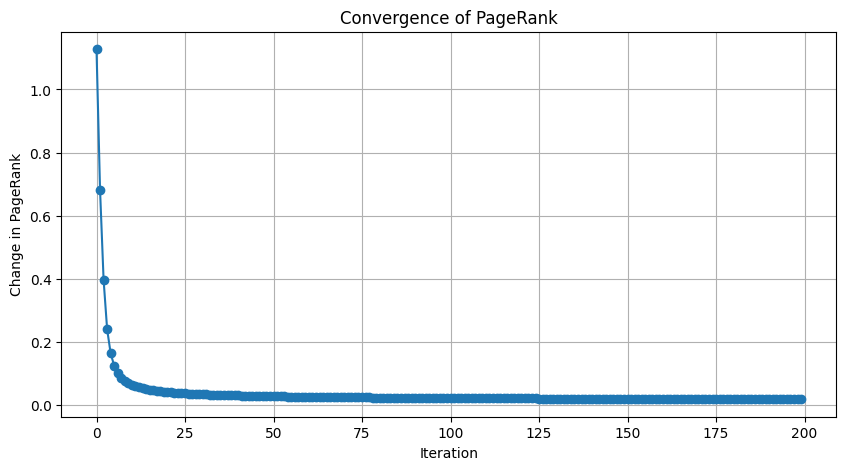

Top 10 PageRank values:
Node 118579: 0.0174
Node 3408: 0.0143
Node 69116: 0.0073
Node 19056: 0.0051
Node 225263: 0.0051
Node 281: 0.0041
Node 79716: 0.0039
Node 79714: 0.0039
Node 445: 0.0029
Node 443: 0.0028


In [ ]:
def markov_matrix(W, alpha=0.85):
    """
    Gives the Markov matrix from the adjacency matrix W.
    Args:
        W (np.ndarray): Adjacency matrix of the graph.
        alpha (float): Damping factor. Default is 0.85.
    Returns:
        np.ndarray: The Markov matrix.
    """
    row_sums = np.sum(W, axis=1)
    row_sums[row_sums == 0] = 1 # Avoid division by zero
    return alpha * W / row_sums[:, np.newaxis]


def get_page_rank(W, alpha=0.85, max_iter=200, tol=1e-6, show_plots=True, top=True):
    """
    Computes the PageRank of the graph represented by the adjacency matrix W.
    Treats W as a sparse matrix.
    Args:
        W (np.ndarray): Adjacency matrix of the graph.
        alpha (float): Damping factor. Default is 0.85.
        max_iter (int): Maximum number of iterations. Default is 200.
        tol (float): Tolerance for convergence. Default is 1e-6.
        show_plots (bool): Whether to show convergence plots. Default is True.
        top (bool): Whether to print the top 10 PageRank values. Default is True
    Returns:
        np.ndarray: The PageRank vector.
    """
    n = W.shape[0]
    M = markov_matrix(W) # normalize W
    pagerank = np.ones(n) / n # initialize PageRank vector
    if show_plots:
        records = []

    for _ in range(max_iter):
        new_pagerank =  M.T @ pagerank # sparse matrix multiplication
        new_pagerank += np.dot(pagerank, (1-alpha)/n) # adding the teleportation factor

        new_pagerank /= np.sum(new_pagerank) # normalize new PageRank vector
        val = np.linalg.norm(new_pagerank - pagerank, ord=1) # convergence value
        if show_plots:
            records.append(val)

        if val < tol: # convergence check
            print(f"Converged after {_+1} iterations with tolerance {tol}.")
            break
        pagerank = new_pagerank
    
    if show_plots:
        plt.figure(figsize=(10, 5))
        plt.plot(records, marker='o')
        plt.title('Convergence of PageRank')
        plt.xlabel('Iteration')
        plt.ylabel('Change in PageRank')
        plt.grid()
        plt.show()
    
    if top:
        top_indices = np.argsort(pagerank)[-10:][::-1]
        print("Top 10 PageRank values:")
        for idx in top_indices:
            print(f"Node {idx}: {pagerank[idx]:.4f}")
    
    return pagerank

pr = get_page_rank(W)


### HITS Implementation

Find the HITS Authority and Hub vectors.

Converged after 36 iterations with tolerance 1e-06.


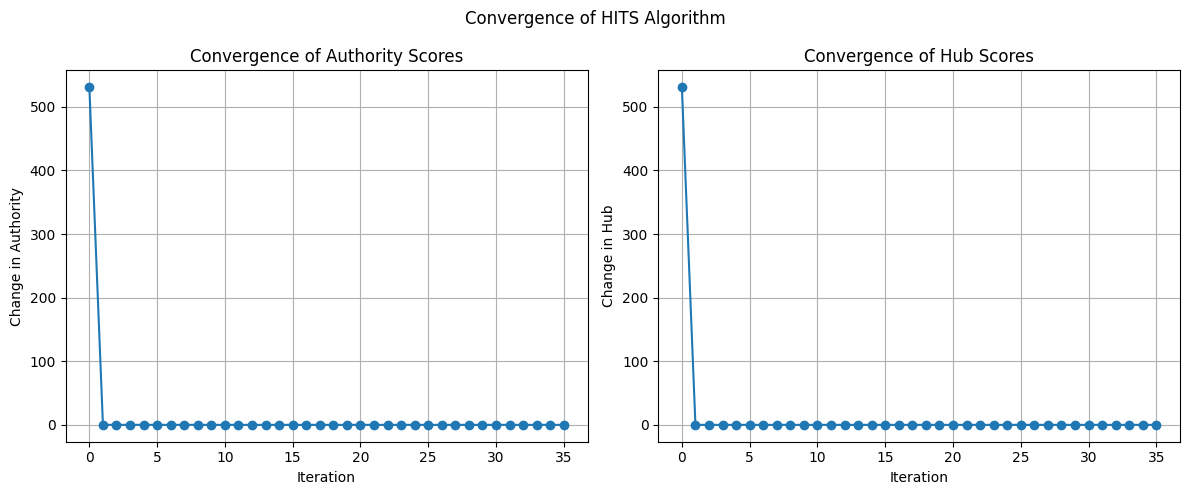

Top 10 Authority scores:
Node 67: 0.0565
Node 341: 0.0514
Node 474: 0.0507
Node 476: 0.0505
Node 473: 0.0505
Node 477: 0.0505
Node 475: 0.0505
Node 472: 0.0505
Node 478: 0.0505
Node 471: 0.0505

Top 10 Hub scores:
Node 86974: 0.0000
Node 86980: 0.0000
Node 86981: 0.0000
Node 86975: 0.0000
Node 12016: 0.0000
Node 12032: 0.0000
Node 19027: 0.0000
Node 86973: 0.0000
Node 5189: 0.0000
Node 5187: 0.0000


In [27]:
def HITS(W, max_iter=100, tol=1e-6, show_plots=True, top=True):
    """
    Computes the HITS (Hyperlink-Induced Topic Search) algorithm for the graph represented by the adjacency matrix W.
    Args:
        W (np.ndarray): Adjacency matrix of the graph.
    Returns:
        tuple: Authority and Hub scores as numpy arrays.
    """
    n = W.shape[0]
    authority = np.ones(n)
    hub = np.ones(n)
    if show_plots:
        records_auth = []
        records_hub = []

    for _ in range(max_iter):  # Number of iterations
        new_authority = W.T @ hub
        new_hub = W @ authority

        new_authority /= np.sum(new_authority)  # Normalize authority scores
        new_hub /= np.sum(new_hub)  # Normalize hub scores

        auth_val = np.linalg.norm(new_authority - authority, ord=2)
        hub_val = np.linalg.norm(new_hub - hub, ord=2)

        if show_plots:
            records_auth.append(auth_val)
            records_hub.append(hub_val)
        if auth_val < tol and hub_val < tol:
            print(f"Converged after {_+1} iterations with tolerance {tol}.")
            break
            
        authority = new_authority
        hub = new_hub
    
    if show_plots:
        plt.figure(figsize=(12, 5))
        plt.suptitle('Convergence of HITS Algorithm')

        plt.subplot(1, 2, 1)
        plt.plot(records_auth, marker='o')
        plt.title('Convergence of Authority Scores')
        plt.xlabel('Iteration')
        plt.ylabel('Change in Authority')
        plt.grid()

        plt.subplot(1, 2, 2)
        plt.plot(records_hub, marker='o')
        plt.title('Convergence of Hub Scores')
        plt.xlabel('Iteration')
        plt.ylabel('Change in Hub')
        plt.grid()

        plt.tight_layout()
        plt.show()
    
    if top:
        top_auth_indices = np.argsort(authority)[-10:][::-1]
        top_hub_indices = np.argsort(hub)[-10:][::-1]
        print("Top 10 Authority scores:")
        for idx in top_auth_indices:
            print(f"Node {idx}: {authority[idx]:.4f}")
        print("\nTop 10 Hub scores:")
        for idx in top_hub_indices:
            print(f"Node {idx}: {hub[idx]:.4f}")

    return authority, hub

authority, hub = HITS(W)


---

---

# Natural Language Processing (NLP)



In [38]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
import re


---

## Beam Search

As an introduction to NLP, we aim to implement the Beam Search Algorithm using the novella [The Time Machine by H. G. Wells](https://raw.githubusercontent.com/probml/probml-data/main/data/timemachine.txt).

Beam Search is a breadth-first search to find the most likely output sequence from the given data. In the case our data is a text document with sentences, Beam Search aims to output the sentence most likely to occur based on the words in the text, taking into account sentence structure (i.e., understanding that certain words tend to appear before certain other words based on probability of appearance). For example: $P(\text{'I', 'like', 'to', 'eat', 'apples'}) > P(\text{'apples', 'like', 'to', 'eat', 'me'}).$

We can do this with a Markov Model, where each word is a "token" and we keep track of what other tokens they preceed, giving them a probability of what word would come next in an arbitrary sentence containing that token. This is a Markov model since sentences are in of themselves chains of words, so certain words are more likely to occur prior to another, i.e. $P(\text{apple}|\text{eat}) > P(\text{eat}|\text{apple}).$ With one prior, this is called "Unigram", and if we increased the number of priors to two, it would be "bigram", then "trigram" and so on.

For this problem, you will generate a model trained on all of the sentences in the novella. With this trained model, you will then generate the sentence most likely to generate when fed a specific word. As a sanity check, the token "time" is very likely to be succeeded by "traveller." For this, we will only consider the unigram case.

 - Deconstruct the text into tokens and apply a tracking number to each token. Remember that the start and end of a sentence should be tokens as well!

 - Create a model that generates the Markov matrix $P$, where $P_{i,j}$ is the probability token $i$ preceeds token $j$.

 - Generate the most likely sentence given a token index.




### Parsing

In [5]:
file_path = 'timemachine.txt'
with open(file_path, 'r') as file:
    content = file.read()

lines = [s + "\n" for s in content.split("\n")]
raw_dataset = [re.sub("[^A-Za-z]+", " ", st).lower().split() for st in lines]

# Concat sentences into single string of chars
# skip blank lines
sentences = [s for s in raw_dataset if s]

# Add the start and stop tokens to each sentence in the file
START_TOKEN = '<s>'
STOP_TOKEN = '</s>'
sentence_list = []
for sentence in sentences:
    sentence_list.append([START_TOKEN] + sentence + [STOP_TOKEN])

# Building the dict and the map from the words to integers for the purpose of training.
word2idx={}
idx2word={}
idx=0
for line in sentence_list:
    for word in line:
        if word not in word2idx:
            word2idx[word]=idx
            idx2word[idx]=word
            idx+=1

# Transform the words in each sentence to integers
train_data=[]
for line in sentence_list:
    train_data.append([word2idx[word] for word in line])

### Generating

In [6]:
import numpy as np

class SimpleMarkovModel(object):
    def __init__(self, status_num=None):
        self.pi = np.zeros(shape=(status_num))
        self.P  = np.zeros(shape=(status_num, status_num))

    def fit(self, x):
        if type(x[0]) == list:
            for clist in x:
                self.pi[clist[0]] += 1
                for cindex in range(0, len(clist) - 1):
                    self.P[clist[cindex ], clist[cindex + 1]] += 1
        else:
            for index in range(0, len(x) - 1):
                self.pi[x[index]] += 1
                self.P[x[index ], x[index + 1]] += 1
        # normalization
        self.pi = self.pi / np.sum(self.pi)
        normalization = np.sum(self.P, axis=1)
        normalization[normalization == 0] = 1
        self.P = self.P / normalization[:, np.newaxis]


    def generate_status(self, step_times=10, stop_status=None, set_start_status=None, beam_num=5, alpha = 0.75):
        """
        full beam search
        :param step_times: maximum step_times
        :param stop_status: list of stoping state
        :param set_start_status: set the initial state manually
        :param beam_num: only when search_type="beam" to keep top k
        :return:
        """

        if stop_status is None:
            stop_status = []

        start_status = np.random.choice(len(self.pi.reshape(-1)),
                                        p=self.pi.reshape(-1)) if set_start_status is None else set_start_status

        rst = [start_status]
        top_k_rst = [[start_status]]
        top_k_prob = [0.0]
        for _ in range(0, step_times):
            new_top_k_rst = []
            new_top_k_prob = []
            for k_index, k_rst in enumerate(top_k_rst):
                  k_rst_last_status = k_rst[-1]
                  # get top k largest idx
                  top_k_idx = self.P[k_rst_last_status, : ].argsort()[::-1][0:beam_num]
                  for top_k_status in top_k_idx:
                    new_top_k_rst.append(k_rst + [top_k_status])
                    new_top_k_prob.append(top_k_prob[k_index] + np.log(1e-12+self.P[k_rst_last_status, top_k_status]))

            # sort all beam_num*beam_num results and get the top beam_num
            top_rst_idx = np.asarray(new_top_k_prob).argsort()[::-1][0:beam_num]
            rst = new_top_k_rst[top_rst_idx[0]]
            # update
            top_k_rst = []
            top_k_prob = []
            for top_idx in top_rst_idx[:beam_num]:
              if new_top_k_rst[top_idx][-1] in stop_status:
                  rst = new_top_k_rst[top_idx]
                  break
              else:
                  top_k_rst.append(new_top_k_rst[top_idx])
                  top_k_prob.append(new_top_k_prob[top_idx])

        return rst

In [7]:
smm=SimpleMarkovModel(status_num=len(word2idx))
smm.fit(train_data)

idx_list=smm.generate_status(set_start_status=word2idx['time'] , stop_status=[word2idx[word] for word in ['</s>']])
print([idx2word[idx] for idx in idx_list])

['time', 'traveller', 's', 'pause', 'required', 'for', 'the', 'time', 'traveller', 's', 'face']



---

## Language Modeling on Big Data

One of applications of Markov chain in natural language processing is language model. In particular, we will work on uni-gram and bi-gram.

The following data set provides you with the training data files (a subset of the One Billion Word Language Modeling Bench-
mark). Each line in each file contains a whitespace-tokenized sentence.

- `1b benchmark.train.tokens`: data for training your language models.
- `1b benchmark.dev.tokens`: data for debugging and choosing the best hyperparameters.
- `1b benchmark.test.tokens`: data for evaluating your language models.

### Parsing

Start by parsing all three documents to get a similar word-to-index and index-to-word dictionaries to the above.

In [4]:
class FileParser:
    def __init__(self, train_file="1b_benchmark.train.txt", test_file="1b_benchmark.test.txt", dev_file="1b_benchmark.dev.txt"):
        self.TRAIN_FILE = train_file
        self.TEST_FILE  = test_file
        self.DEV_FILE = dev_file

    def get_train_file_tokens(self):
        return self._tokenize(self._get_sentences(self.TRAIN_FILE))

    def get_dev_file_tokens(self):
        return self._tokenize(self._get_sentences(self.DEV_FILE))

    def get_test_file_tokens(self):
        return self._tokenize(self._get_sentences(self.TEST_FILE))

    def get_train_file_sentence_tokens(self):
        return self._tokenize(self._get_sentences(self.TRAIN_FILE), flatten=False)

    def get_dev_file_sentence_tokens(self):
        return self._tokenize(self._get_sentences(self.DEV_FILE), flatten=False)

    def get_test_file_sentence_tokens(self):
        return self._tokenize(self._get_sentences(self.TEST_FILE), flatten=False)

    def _flatten(self, l):
        return [word for sublist in l for word in sublist]

    def _tokenize(self, sentence_list, flatten=True):
        tokenized_sentences = [re.split("\s+", sentence.strip()) for sentence in sentence_list]

        if flatten:
            return self._flatten(tokenized_sentences)

        return tokenized_sentences

    def _get_sentences(self, file_path):

        l = []
        with open(file_path, "r", encoding='cp850') as f:
            l = f.readlines()

        # Add the start and stop tokens to each sentence in the file
        sentence_list = []
        for sentence in l:
            sentence_list.append("<s>" + " " + sentence + " " + "</s>")

        return sentence_list

In [5]:
fp = FileParser()
train_tokens = fp.get_train_file_sentence_tokens()
dev_tokens = fp.get_dev_file_sentence_tokens()
test_tokens = fp.get_test_file_sentence_tokens()

# Building the dict and the map from the words to integers for the purpose of training.
word2idx={}
idx2word={}
idx=0
for line in train_tokens:
    for word in line:
        if word not in word2idx:
            word2idx[word]=idx
            idx2word[idx]=word
            idx+=1

# Building the dict and the map from the words to integers for dev.
word2idx_dev={}
idx2word_dev={}
idx=0
for line in dev_tokens:
    for word in line:
        if word not in word2idx_dev:
            word2idx_dev[word]=idx
            idx2word_dev[idx]=word
            idx+=1

word2idx_test={}
idx2word_test={}
idx=0
for line in test_tokens:
    for word in line:
        if word not in word2idx_test:
            word2idx_test[word]=idx
            idx2word_test[idx]=word
            idx+=1

# Transform the words in each sentence to integers
train_data=[]
for line in train_tokens:
    train_data.append([word2idx[word] for word in line])

dev_data=[]
for line in dev_tokens:
    dev_data.append([word2idx_dev[word] for word in line])

test_data=[]
for line in test_tokens:
    test_data.append([word2idx_test[word] for word in line])

### Language Model Tasks

 - Implement **Laplace Smoothing** with the smoothing factor =1 in the function ```get_unigram_probability``` and ```get_bigram_probability```. In the bigram model, try to implement it as efficient as possible. **Hint:** For bigrams $(t_1,t_2)$ which do not occur in the sample, what is $p(t_2|t_1)$? For fixed $t_1$, are these probability the same?

 - Complete functions ```get_unigram_sentence_log_probability``` and ```get_bigram_sentence_log_probability``` to calculate the log probability of the given sentence. You need to consider the situation that when Laplace Smoothing is true and the situation that when Laplace Smoothing is false.

 - To make your language model work better, you will implement linear interpolation smoothing between unigram, bigram. $\begin{align} p'(t_2|t_1) = \lambda_1 p(t_2) + \lambda_2 p(t_2|t_1),\end{align}$ where $p'$ represents the smoothed probability, the hyperparameters $\lambda_1, \lambda_2$ are weights on the unigram, bigram language models, respectively. So $\lambda_1+\lambda_2= 1$. Complete functions ```get_linear_interpolation_probability``` and ```get_linear_interpolation_sentence_log_probability``` with $\ \lambda = (\lambda_1, \lambda_2)$ stored in ```linear_interpolation_factors```.

 - Testing the smoothed probability with several sentences in the development dataset. You should test when laplace smoothing is True and when laplace smoothing is False. You might find some words in testing dataset are not appeared in training set and you can set a default probability for this situation.  

 - Report the **perplexity scores** of the linear interpolation of language model for your training, and development sets. Report no more than 5 different sets of $\lambda$. Briefly discuss the experimental results. Putting it all together, report perplexity on the test set, using the hyperparameters that you chose from the development set. Specify those hyperparameters.

 - As a bonus, implement Beam Search for the following data set.

In [41]:
class LanguageModel(object):
    def __init__(self, laplace_smoothing=False, laplace_smoothing_factor=1,linear_interpolation_factor=0.5):

        self.laplace_smoothing = laplace_smoothing
        self.laplace_smoothing_factor = laplace_smoothing_factor
        self.linear_interpolation_factor = linear_interpolation_factor

        self.unigram_freqs = {}
        self.unigram_corpus_length = 0
        self.num_unique_unigrams = 0

        self.bigram_freqs = {}
        self.bigram_corpus_length = 0
        self.num_unique_bigrams = 0

    def fit_unigram(self, train_data):
        """
        Fits the unigram model to the training data.
        Args:
            train_data (list): List of sentences, where each sentence is a list of word indices.
        """
        for sentence in train_data:
            for word_idx in sentence:
                if word_idx not in self.unigram_freqs:
                    self.unigram_freqs[word_idx] = 0
                self.unigram_freqs[word_idx] += 1
                self.unigram_corpus_length += 1

        self.num_unique_unigrams = len(self.unigram_freqs)

        if self.laplace_smoothing:
            self.unigram_freqs = {k: v + self.laplace_smoothing_factor for k, v in self.unigram_freqs.items()}
            self.unigram_corpus_length += self.laplace_smoothing_factor * self.num_unique_unigrams

    def fit_bigram(self, train_data):
        """
        Fits the bigram model to the training data.
        Args:
            train_data (list): List of sentences, where each sentence is a list of word indices.
        """
        for sentence in train_data:
            for i in range(len(sentence) - 1):
                bigram = (sentence[i], sentence[i + 1])
                if bigram not in self.bigram_freqs:
                    self.bigram_freqs[bigram] = 0
                self.bigram_freqs[bigram] += 1
                self.bigram_corpus_length += 1

        self.num_unique_bigrams = len(self.bigram_freqs)

        if self.laplace_smoothing:
            for bigram in self.bigram_freqs:
                self.bigram_freqs[bigram] += self.laplace_smoothing_factor
            self.bigram_corpus_length += self.laplace_smoothing_factor * self.num_unique_bigrams
    
    def unigram_prob(self, word_idx):
        """
        Computes the unigram probability of a word.
        Args:
            word_idx (int): Index of the word.
        Returns:
            float: Unigram probability of the word.
        """
        if self.laplace_smoothing:
            return self.unigram_freqs.get(word_idx, 0) / self.unigram_corpus_length
        else:
            return self.unigram_freqs.get(word_idx, 0) / self.unigram_corpus_length if self.unigram_corpus_length > 0 else 0.0
    
    def bigram_prob(self, word_idx1, word_idx2):
        """
        Computes the bigram probability of a word pair.
        Args:
            word_idx1 (int): Index of the first word.
            word_idx2 (int): Index of the second word.
        Returns:
            float: Bigram probability of the word pair.
        """
        if self.laplace_smoothing:
            bigram_count = self.bigram_freqs.get((word_idx1, word_idx2), 0)
            unigram_count = self.unigram_freqs.get(word_idx1, 0)
            return (bigram_count + self.laplace_smoothing_factor) / (unigram_count + self.laplace_smoothing_factor * self.num_unique_unigrams)
        else:
            bigram_count = self.bigram_freqs.get((word_idx1, word_idx2), 0)
            unigram_count = self.unigram_freqs.get(word_idx1, 0)
            return bigram_count / unigram_count if unigram_count > 0 else 0.0
    
    def get_sentence_log_prob(self, sentence, bigram=True):
        """
        Computes the log probability of a sentence. Adds a small constant to avoid log(0).
        Args:
            sentence (list): List of word indices representing the sentence.
            bigram (bool): Whether to use bigram probabilities. Default is True.
        Returns:
            float: Log probability of the sentence.
        """
        log_prob = 0.0
        if bigram:
            for i in range(len(sentence) - 1):
                log_prob += np.log(self.bigram_prob(sentence[i], sentence[i + 1]) + 1e-12)
        else:
            for word_idx in sentence:
                log_prob += np.log(self.unigram_prob(word_idx) + 1e-12)
    
        return log_prob
    
    def get_linear_interpolation_prob(self, word_idx1, word_idx2, alpha=None):
        """
        Computes the linear interpolation probability of a word pair.
        Args:
            word_idx1 (int): Index of the first word.
            word_idx2 (int): Index of the second word.
        Returns:
            float: Linear interpolation probability of the word pair.
        """
        if alpha is None:
            alpha = self.linear_interpolation_factor
            
        bigram_prob = self.bigram_prob(word_idx1, word_idx2)
        unigram_prob = self.unigram_prob(word_idx2)
        return alpha * bigram_prob + (1 - alpha) * unigram_prob
    
    def get_linear_interpolation_sentence_log_prob(self, sentence, alpha=None):
        """
        Computes the log probability of a sentence using linear interpolation.
        Args:
            sentence (list): List of word indices representing the sentence.
            alpha (float): Linear interpolation factor. Default is None, which uses the model's default factor.
        Returns:
            float: Log probability of the sentence.
        """
        log_prob = 0.0
        for i in range(len(sentence) - 1):
            log_prob += np.log(self.get_linear_interpolation_prob(sentence[i], sentence[i + 1], alpha) + 1e-12)
        
        return log_prob
    
    def get_perplexity(self, sentence, bigram=True):
        """
        Computes the perplexity of a sentence.
        Args:
            sentence (list): List of word indices representing the sentence.
            bigram (bool): Whether to use bigram probabilities. Default is True.
        Returns:
            float: Perplexity of the sentence.
        """
        log_prob = self.get_sentence_log_prob(sentence, bigram)
        return np.exp(-log_prob / (len(sentence) - 1)) if len(sentence) > 1 else float('inf')
    
    def get_all_perplexity(self, sentences, bigram=True):
        """
        Computes the perplexity of a list of sentences.
        Args:
            sentences (list): List of sentences, where each sentence is a list of word indices.
            bigram (bool): Whether to use bigram probabilities. Default is True.
        Returns:
            float: Perplexity of the sentences.
        """
        total_log_prob = 0.0
        total_words = 0
        
        for sentence in sentences:
            log_prob = self.get_sentence_log_prob(sentence, bigram)
            total_log_prob += log_prob
            total_words += len(sentence) - 1

        if total_words == 0:
            return float('inf')
        
        perplexity = np.exp(-total_log_prob / total_words)
        return perplexity
    
    def beam_search(self, start_word_idx, stop_word_idx, beam_size=5, max_length=20):
        """
        Performs beam search to generate a sequence of words starting from a given word index.
        Args:
            start_word_idx (int): Index of the starting word.
            stop_word_idx (int): Index of the stopping word.
            beam_size (int): Size of the beam. Default is 5.
            max_length (int): Maximum length of the generated sequence. Default is 20.
        Returns:
            list: List of word indices representing the generated sequence.
        """
        sequences = [[start_word_idx]]
        for _ in range(max_length):
            all_candidates = []
            for seq in sequences:
                if seq[-1] == stop_word_idx:
                    all_candidates.append(seq)
                    continue
                for next_word_idx in self.unigram_freqs.keys():
                    new_seq = seq + [next_word_idx]
                    prob = self.get_linear_interpolation_prob(seq[-1], next_word_idx)
                    all_candidates.append((new_seq, prob))
            
            # Sort by probability and select the top beam_size sequences
            ordered = sorted(all_candidates, key=lambda x: x[1], reverse=True)
            sequences = [seq for seq, _ in ordered[:beam_size]]
        
        return sequences
    

We first show the output without Laplace smoothing for the purpose of seeing its impact when it is included:

In [31]:
# Laplace Smoothing is set to False
LM = LanguageModel(laplace_smoothing=False, laplace_smoothing_factor=1)
LM.fit_unigram(train_data)
LM.fit_bigram(train_data)

# Calculate perplexity for the training set
train_perplexity_unigram = LM.get_all_perplexity(train_data, bigram=False)
train_perplexity_bigram = LM.get_all_perplexity(train_data, bigram=True)
print(f"Train set perplexity (unigram): {train_perplexity_unigram}")
print(f"Train set perplexity (bigram): {train_perplexity_bigram}")

# Calculate perplexity for the dev set
dev_perplexity_unigram = LM.get_all_perplexity(dev_data, bigram=False)
dev_perplexity_bigram = LM.get_all_perplexity(dev_data, bigram=True)
print(f"Dev set perplexity (unigram): {dev_perplexity_unigram}")
print(f"Dev set perplexity (bigram): {dev_perplexity_bigram}")

# Calculate perplexity for the test set
test_perplexity_unigram = LM.get_all_perplexity(test_data, bigram=False)
test_perplexity_bigram = LM.get_all_perplexity(test_data, bigram=True)
print(f"Test set perplexity (unigram): {test_perplexity_unigram}")
print(f"Test set perplexity (bigram): {test_perplexity_bigram}")

Train set perplexity (unigram): 1768.9267148651559
Train set perplexity (bigram): 74.12469907047699
Dev set perplexity (unigram): 22697.97974507288
Dev set perplexity (bigram): 132084405511.47798
Test set perplexity (unigram): 23678.194149336094
Test set perplexity (bigram): 101380818193.9979


In [33]:
# Laplace Smoothing is set to True
LM = LanguageModel(laplace_smoothing=True, laplace_smoothing_factor=1)
LM.fit_unigram(train_data)
LM.fit_bigram(train_data)

# Calculate perplexity for the training set
train_perplexity_unigram = LM.get_all_perplexity(train_data, bigram=False)
train_perplexity_bigram = LM.get_all_perplexity(train_data, bigram=True)
print(f"Train set perplexity (unigram): {train_perplexity_unigram}")
print(f"Train set perplexity (bigram): {train_perplexity_bigram}")

# Calculate perplexity for the dev set
dev_perplexity_unigram = LM.get_all_perplexity(dev_data, bigram=False)
dev_perplexity_bigram = LM.get_all_perplexity(dev_data, bigram=True)
print(f"Dev set perplexity (unigram): {dev_perplexity_unigram}")
print(f"Dev set perplexity (bigram): {dev_perplexity_bigram}")

# Calculate perplexity for the test set
test_perplexity_unigram = LM.get_all_perplexity(test_data, bigram=False)
test_perplexity_bigram = LM.get_all_perplexity(test_data, bigram=True)
print(f"Test set perplexity (unigram): {test_perplexity_unigram}")
print(f"Test set perplexity (bigram): {test_perplexity_bigram}")

Train set perplexity (unigram): 1785.682646528467
Train set perplexity (bigram): 4084.6476035842693
Dev set perplexity (unigram): 21397.884570942624
Dev set perplexity (bigram): 70018.11498163732
Test set perplexity (unigram): 22096.558845721785
Test set perplexity (bigram): 71637.05511803656


We can see that Laplace smoothing makes a miniscule difference in the unigram perplexities, but vastly improves the bigram perplexities. This is to do with many more zero occurance word combinations in a bigram case (a trio of words required) vs the unigram case (duo of words).

Below we show the linear interpolation probability of the $0^{th}$ sentence in our dev and test sets after training.

Best alpha for training set: 0.9500000000000001 with log probability: -152.93756346133046
Best alpha for dev set: 0.9500000000000001 with log probability: -190.44882522491747


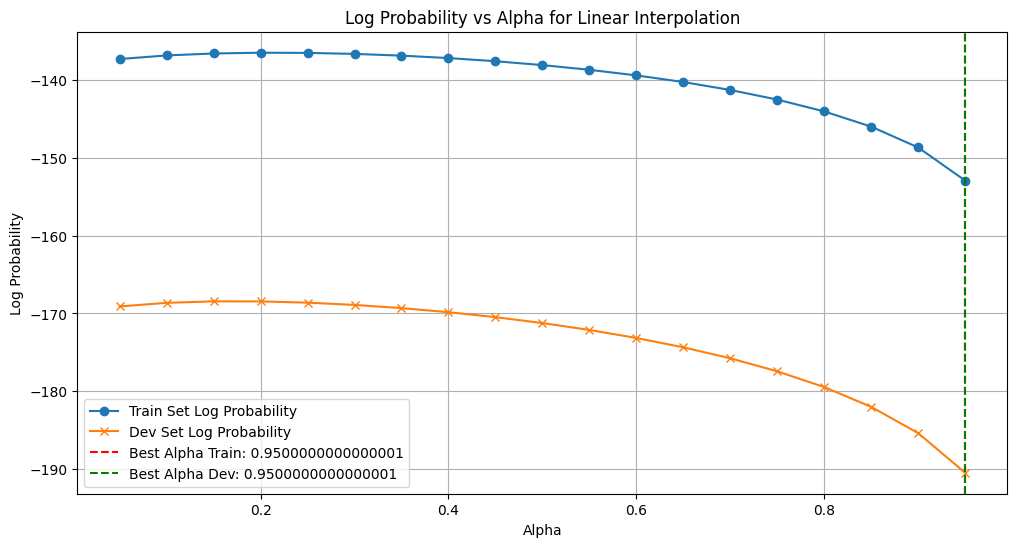

Test set log probability with best alpha 0.95: -365.6875902317095


In [ ]:
# With Laplace Smoothing, we can also calculate the linear interpolation probability
LM = LanguageModel(laplace_smoothing=True, laplace_smoothing_factor=1)
LM.fit_unigram(train_data)
LM.fit_bigram(train_data)

# finding the best alpha for linear interpolation
alphas = np.arange(.05, 1.0, 0.05)  # Alphas from 0.05 to 0.95 with step 0.05
best_alpha = 0.5
best_alpha_dev = 0.5
best_train_interpolation = np.infty
best_dev_interpolation = np.infty
train_interpolations = []
dev_interpolations = []

for alpha in alphas:
    train_log_prob = LM.get_linear_interpolation_sentence_log_prob(train_data[0], alpha=alpha)
    dev_log_prob = LM.get_linear_interpolation_sentence_log_prob(dev_data[0], alpha=alpha)

    train_interpolations.append(train_log_prob)
    dev_interpolations.append(dev_log_prob)

    if train_log_prob < best_train_interpolation:
        best_train_interpolation = train_log_prob
        best_alpha = alpha

    if dev_log_prob < best_dev_interpolation:
        best_dev_interpolation = dev_log_prob
        best_alpha_dev = alpha

print(f"Best alpha for training set: {best_alpha} with log probability: {best_train_interpolation}")
print(f"Best alpha for dev set: {best_alpha_dev} with log probability: {best_dev_interpolation}")

plt.figure(figsize=(12, 6))
plt.plot(alphas, train_interpolations, label='Train Set Log Probability', marker='o')
plt.plot(alphas, dev_interpolations, label='Dev Set Log Probability', marker='x')
plt.axvline(x=best_alpha, color='r', linestyle='--', label=f'Best Alpha Train: {best_alpha}')
plt.axvline(x=best_alpha_dev, color='g', linestyle='--', label=f'Best Alpha Dev: {best_alpha_dev}')
plt.title('Log Probability vs Alpha for Linear Interpolation')
plt.xlabel('Alpha')
plt.ylabel('Log Probability')
plt.legend()
plt.grid()
plt.show()

if best_alpha != best_alpha_dev:
    print(f"Warning: Best alpha for training and dev sets are different: {best_alpha} vs {best_alpha_dev}.")
    print("Using the best alpha from the dev set for test set evaluation.")
best_alpha = np.round(best_alpha_dev, 4)

test_log_prob = LM.get_linear_interpolation_sentence_log_prob(test_data[0], alpha=best_alpha)
print(f"Test set log probability with best alpha {best_alpha}: {test_log_prob}")


In [42]:
# Beam Search Example
LM = LanguageModel(laplace_smoothing=True, laplace_smoothing_factor=1)
LM.fit_unigram(train_data)
LM.fit_bigram(train_data)

# Generate a sequence using beam search
start_word_idx = word2idx['the']  # Starting word index
stop_word_idx = word2idx['</s>']  # Stopping word index
beam_size = 5  # Size of the beam

generated_sequences = LM.beam_search(start_word_idx, stop_word_idx, beam_size=beam_size)

print("Generated sequences:")
for seq in generated_sequences:
    print(" ".join([idx2word[idx] for idx in seq if idx in idx2word]))
    print("Log Probability:", LM.get_linear_interpolation_sentence_log_prob(seq, alpha=best_alpha))
    

TypeError: 'int' object is not subscriptable


---

## Forward-Backward Sampling Algorithm


---

## Speech Recognition


---

## Hidden Markov Models (HMM) and NLP